In [27]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [28]:
class individuo:
    x = []
    f1 = 0
    f2 = 0
    f = 0
    s = 0
class powerLaw:
    def generate(self, alpha, mult):
        nd = random.random()*2;
        if nd >= 1:
            return mult*math.pow((2-nd),(1/(1-alpha)))
        else:
            return -mult*math.pow((nd),(1/(1-alpha)));

In [29]:
#UR
class urf1:
    def f(self,x):
        suma = 0
        n=len(x)
        for i in range(0,n-1):
            suma += -10*math.exp(-0.2*math.sqrt(x[i]**2 + x[i+1]**2))
        return suma
class urf2:
    def f(self,x):
        suma = 0
        n = len(x)
        for i in range(0, n):
            suma += abs(x[i])**0.8 + math.sin(x[i])**3
        return suma
#QV
class qvf1:
    def f(self,x):
        suma = 0
        n=len(x)
        for i in range(0,n):
            suma += x[i]**2-10*math.cos(2*math.pi*x[i])+10
        return (suma/n)**0.25
class qvf2:
    def f(self,x):
        suma = 0
        n = len(x)
        for i in range(0, n):
            suma += (x[i]-1.5)**2-10*math.cos(2*math.pi*(x[i]-1.5)) +10
        return (suma/n)**0.25
class zdt6f1:
    def f(self,x):
        return 1-math.exp(-4*x[0])*math.sin(6*math.pi*x[0])**6
class zdt6g:
    def f(self,x):
        suma = 0
        for i in range(1,1):
            suma += x[i]
        return 1 + ()

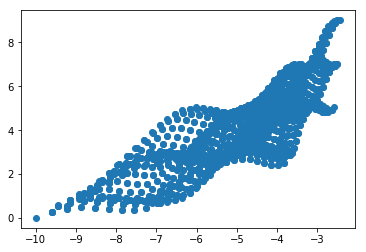

In [30]:
a=-5
b=5
x = np.arange(a,b,0.2)
y = np.arange(a,b,0.2)
f1 = urf1()
f2 = urf2()
f1v = []
f2v = []
for i in range(0, len(x)):
    for j in range(0, len(y)):
        f1v.append(f1.f([x[i],y[j]]))
        f2v.append(f2.f([x[i],y[j]]))
plt.plot(f1v,f2v,'o')

In [31]:
class spea2:
    def iniciarPoblacion(self, n, p, f1, f2):
        for i in range(0,n):
            temp = individuo()
            x = []
            for j in range(0,d):
                x.append(randpl.generate(alpha,multpl))
            temp.x = x
            temp.f1 = f1.f(x)
            temp.f2 = f2.f(x)
            p.append(temp)
        self.calcularFuerza(p, f1, f2)
        self.calcularFitness(p, f1, f2)
        pass
    def calcularFuerza(self, p, f1, f2):
        for i in range(0,len(p)):
            for j in range(0,len(p)):
                if p[i].f1 < p[j].f1:
                    if p[i].f2 < p[j].f2:
                        p[i].s = p[i].s + 1
        pass
    def calcularFitness(self, p, f1, f2):
        for i in range(0,len(p)):
            for j in range(0,len(p)):
                if p[j].f1 < p[i].f1:
                    if p[j].f2 < p[i].f2:
                        p[i].f = p[i].f + p[j].s + 1
        pass
    def tomarArchivo(self, p, pp, npp):
        t = p + pp
        t.sort(key=lambda t: t.f)
        r = t[0:npp].copy()
        return r
    def cruce(self,pp,p,n, f1, f2):
        np = []
        for i in range(0,n):
            temp = individuo()
            xn = []
            pos1 = int(random.uniform(0, len(pp)-1))
            p1 = pp[pos1]
            pos2 = int(random.uniform(0, len(p)-1))
            p2 = p[pos2]
            alphas = []
            alphasum = 0
            for j in range(0,d):
                alph = random.random()
                alphas.append(alph)
                alphasum += alph
            for j in range(0,d):
                alphas[j] = alphas[j]/alphasum
            for j in range(0,d):
                xn.append(p1.x[j]*alphas[j] + p2.x[j]*(1-alphas[j]))
            temp.x = xn
            temp.f1 = f1.f(xn)
            print(xn)
            print(temp.f1)
            temp.f2 = f2.f(xn)
            np.append(temp)
        self.calcularFuerza(np, f1, f2)
        self.calcularFitness(np, f1, f2)
        return np

In [32]:
iter = 150
p = []
d = 2
n = 40 #individuos
npp = 30 #tamaño archivo
alpha = 20
multpl = 30
randpl = powerLaw()
f1 = urf1()
f2 = urf2()
algor = spea2()
algor.iniciarPoblacion(n,p,f1,f2)
pp=[] #archivo
f1frames=[]
f2frames=[]
for i in range(0,iter):
    pp = algor.tomarArchivo(p,pp,npp)
    f1frame = []
    f2frame = []
    for j in range(0,len(pp)):
        f1frame.append(pp[j].f1)
        f2frame.append(pp[j].f2)
    f1frames.append(f1frame)
    f2frames.append(f2frame)
    p = algor.cruce(pp,p,n, f1, f2)

[32.391615711740926, -31.81373264086689]
-0.001138788699196312
[-1.5811640193758425, 30.935242375762805]
-0.02039348552522188
[-33.68241474614129, 17.764719651252726]
-0.004925028485098583
[-32.45023797409101, 31.559769602518475]
-0.001170092014498781
[-30.909177156529267, 1.6588978889047183]
-0.02048326119059441
[11.429881137753878, -31.720431336685962]
-0.01178661446302841
[-31.369348367170105, 3.6223206866351187]
-0.0180795433277926
[-15.355923431000818, -30.620987965539385]
-0.010582600136620516
[-31.67958362794409, 30.955349023656005]
-0.0014216684190395297
[27.30895597611254, 30.746523460625518]
-0.0026796215202525694
[-1.489588703315384, -0.16215469763575285]
-7.4105699747247975
[-30.15846990486846, -30.279468831225362]
-0.0019408149816522904
[-30.59074352861246, 34.85531212049846]
-0.0009372940036473207
[-20.45243906850643, -20.58636100287276]
-0.03016090969846433
[-31.447557356515574, 31.40518081474459]
-0.0013793589693530772
[-30.492980062457825, 31.362916739475864]
-0.001586

-8.805252303030237
[0.03529766857543623, 0.07376748946629556]
-9.837775148642942
[-0.6242128481083778, -0.2749239231800208]
-8.724806650054042
[-0.032067705892790614, -0.031120695038999144]
-9.911026251050231
[0.17263499241026423, 0.03547033091075533]
-9.653657307521314
[-0.08444206565697981, -0.22466262216594504]
-9.531322953489742
[-0.4930281968234517, 0.013279241414002097]
-9.060675662880044
[-1.0112528942315306, -0.1109452213747337]
-8.158994738554664
[-0.046055391012975386, 0.22909603233662987]
-9.543394125550101
[-0.36215297897077725, 0.009000745413407485]
-9.301094958570799
[-0.2856015456393338, -0.01693916192791008]
-9.443856318907248
[-0.3472998349266005, 0.05852309665490591]
-9.319843744669733
[0.47973294113329673, 0.022931940377876922]
-9.084130129437538
[0.08004242865244418, 0.07046238993303033]
-9.788981554542088
[-0.8455340021402458, 0.21137284897287137]
-8.400357879252903
[-1.2944082882569634, 0.024041891602830746]
-7.718799020296753
[-1.041661470689341, 0.04253611313966

[-0.020780019729715424, -0.019419950475052447]
-9.94327761135228
[-0.008934087742123951, -0.0036330499643144765]
-9.98072952968659
[-0.06369042395562984, -0.003940731221630914]
-9.873186505638188
[-0.0016592662749877998, -0.020702438948595345]
-9.958548497044765
[-0.12138013184908884, -0.008564694505340685]
-9.759573574975773
[-0.013862585348940916, 0.007685273197053682]
-9.968349424389176
[-0.034487736314545235, 0.005264802604641932]
-9.930468305071074
[-0.010480456737025716, -0.03421126753087335]
-9.928694255480558
[-0.08406031417636056, 0.0025519681326611403]
-9.833208547186683
[-0.0027409115808292328, -0.02005992352520805]
-9.95958924914162
[-0.031324717671384714, -0.005854880668631743]
-9.936468300042756
[-0.022939661421050125, -0.05104215487640201]
-9.88870383222591
[-0.020498084083568197, -0.00020574417113619105]
-9.959085694801924
[-0.0138101841613497, -0.04735270531346382]
-9.901834106446781
[-0.009379065286837879, -0.007007703224913485]
-9.976611606573934
[-0.0239611641101490

[0.001875773866795752, 8.63403050862869e-05]
-9.996245185305202
[0.0007621120593068779, 0.00012626638440071933]
-9.998455117092028
[0.00024347818482578883, 0.00026433466438972685]
-9.99928126455896
[0.000369225440116999, 0.0001964703324785607]
-9.999163547047658
[-2.8631404791922723e-05, 0.00011936550121481694]
-9.99975450042521
[0.0004911771976281378, 0.00020277999460015776]
-9.998937277538875
[0.0003452996943814972, 9.443405231289495e-05]
-9.999284065660675
[-0.00020826171427307214, 0.0001270081220186793]
-9.999512143046546
[0.000565302764010188, 0.00036988286352519393]
-9.998648972405684
[0.0010736861612983652, 0.0020043009974966405]
-9.995453496289654
[0.000647335446184888, -0.0017536090116616063]
-9.996262149435204
[0.0011695321459069949, 5.6705894461630624e-05]
-9.99765846206499
[0.0004383794325483966, -0.0003153484276034284]
-9.998920019141966
[-0.00011511934069585297, 0.00027500132407741126]
-9.99940376886469
[5.752056012372159e-05, -0.00034527502647186054]
-9.999299957482352
[

-9.999946566947354
[5.00973272578842e-06, -8.243946073978934e-07]
-9.999989845784663
[-2.7889896073151235e-07, -1.7549252415051644e-06]
-9.999996446102921
[-7.293697884886532e-06, 3.4745442559929106e-05]
-9.999928994792931
[-2.0978014830731557e-06, -6.397475006090137e-06]
-9.999986534726666
[7.488378376569018e-06, 1.8105073141545546e-06]
-9.999984591735206
[2.7788643287298887e-06, 1.0566468294792188e-05]
-9.999978148494025
[6.0582665159314e-06, 9.544281142030997e-06]
-9.9999773906562
[-7.86282986876136e-06, -8.451876489286916e-06]
-9.999976912514033
[-1.570437269642333e-05, -8.306131454198223e-06]
-9.999964468716877
[4.315995246684725e-06, -7.18695757719936e-06]
-9.999983233359746
[2.4542484234441906e-06, 8.977105787228502e-07]
-9.999994773446247
[2.191753417958006e-05, -3.0257775065502985e-06]
-9.999955749283947
[7.992557569927908e-07, -2.027889378763243e-06]
-9.999995640576632
[4.459379395006466e-06, 2.422891698280735e-06]
-9.999989849838894
[-1.379199161640997e-06, 2.867800660177769

-9.999998978923113
[6.636666289414287e-08, -1.769509214119496e-07]
-9.999999622025603
[2.207438528102261e-07, 2.8021086455316636e-07]
-9.999999286568944
[6.523727303598511e-07, 4.6651317749448703e-07]
-9.99999839597429
[4.429621419792212e-07, 5.02359300618959e-07]
-9.9999986604773
[3.586849237490859e-07, 2.972265910615491e-07]
-9.999999068338042
[-9.49565490031565e-08, -3.6553725140115376e-08]
-9.999999796501392
[1.3341205352763684e-07, 5.5905002487862566e-08]
-9.99999971069639
[7.704487875359296e-08, 1.2226519859835336e-07]
-9.999999710969265
[1.9918709934424931e-07, 5.850243454717024e-08]
-9.999999584798683
[3.3536019535480794e-07, 1.154103980783677e-07]
-9.999999290673525
[-4.570667042541999e-07, 4.2412888739389904e-08]
-9.999999081939423
[4.5965071466516016e-08, 2.3481841835985312e-08]
-9.999999896768518
[-3.488634415364695e-07, 2.075832380373208e-07]
-9.999999188097327
[6.681018862946869e-08, -2.4771887790753457e-08]
-9.999999857490383
[3.076094568575145e-07, 4.6671205921876217e-0

In [33]:
import plotly.plotly as py
from plotly.grid_objs import Grid, Column
import time
py.sign_in('research123', 'nhcP58x2hVKS1GIuA7NF')

In [34]:
columns = []
for i in range(0, len(f1frames)):
    temp = Column(f1frames[i], 'x'+str(i))
    columns.append(temp)
for i in range(0, len(f2frames)):
    temp = Column(f2frames[i], 'y'+str(i))
    columns.append(temp)
temp = Column(f1v, 'xfunc')
columns.append(temp)
temp = Column(f2v, 'yfunc')
columns.append(temp)

grid = Grid(columns)
py.grid_ops.upload(grid, 'spea__'+str(time.time()), auto_open=False)

'https://plot.ly/~research123/50/'

In [35]:
sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Iter:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}


updatemenus_dict = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

figure = {
    'data': [],
    'layout': {'title': 'SPEA2',
               'xaxis': {'range': [0, 2], 'autorange': True},
               'yaxis': {'range': [0, 2], 'autorange': True},
              },
    'frames': []
}
figure['layout']['updatemenus'] = updatemenus_dict
funcion = {
    'xsrc': grid.get_column_reference('xfunc'),
    'ysrc': grid.get_column_reference('yfunc'),
    'mode': 'markers',
    'marker': {
            'size': 8,
            'color': '#000000'
        },
}
figure['data'].append(funcion)
individuos = {
    'xsrc': grid.get_column_reference('x0'),
    'ysrc': grid.get_column_reference('y0'),
    'mode': 'markers',
        'marker': {
            'size': 10,
            'color': '#ff7777'
        },
}
figure['data'].append(individuos)
for i in range(0,len(f1frames)):
    frame = {'data': [], 'name': str(i)}
    data_dict = {
        'xsrc': grid.get_column_reference('x'+str(i)),
        'ysrc': grid.get_column_reference('y'+str(i)),
        'mode': 'markers',
    }
    frame['data'].append({})
    frame['data'].append(data_dict)
    figure['frames'].append(frame)
    slider_step = {'args': [
        [i],
        {'frame': {'duration': 300, 'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 300}}
     ],
     'label': i,
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)
figure['layout']['sliders'] = [sliders_dict]
py.icreate_animations(figure,'Sharing__'+str(time.time()))